# Aprendizaje de Máqina - Predicción de precios de casas
- Source: Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project

# Imports

#### Python libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np

import sys

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

#### Ancillary modules

In [60]:
%load_ext autoreload
%autoreload 2

sys.path.append("../utils")
from houses_funcs import *
from houses_params import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import datasets

In [3]:
## Sample submission
df_samplesub = pd.read_csv("../data/sample_submission.csv")
df_samplesub

,id,SalePrice
0,1,180401.23
1,2,180401.23
2,3,180401.23
3,4,180401.23
4,5,180401.23
...,...,...
1198,1199,180401.23
1199,1200,180401.23
1200,1201,180401.23
1201,1202,180401.23


In [4]:
## Main dataset
df_test = pd.read_csv("../data/casas_prueba.csv")
df_test

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,...,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,id
0,60,RL,NaN,10316,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,...,1,TA,Attchd,2000.0,RFn,3,839,TA,TA,Y,0,184,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,1
1,120,RL,43.0,7052,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,...,1,Gd,Attchd,2005.0,RFn,2,484,TA,TA,Y,192,36,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,2
2,20,RL,76.0,8243,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1961,1961,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,Fa,Detchd,1985.0,Fin,2,784,TA,TA,Y,170,0,0,0,0,0,NaN,GdPrv,NaN,0,2,2007,WD,Normal,3
3,60,RL,NaN,18275,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,7,8,1962,1998,Gable,CompShg,Plywood,Plywood,None,...,2,Gd,Attchd,1962.0,RFn,2,441,TA,TA,Y,520,102,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,4
4,20,RL,100.0,15263,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1Story,5,5,1959,1959,Gable,CompShg,HdBoard,HdBoard,BrkFace,...,2,Gd,Attchd,1959.0,Unf,1,365,TA,TA,Y,0,132,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,20,RL,90.0,10454,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1957,1957,Hip,CompShg,Plywood,Plywood,Stone,...,0,NaN,Detchd,1957.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,1199
1199,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2007.0,RFn,3,660,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1200
1200,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,...,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,1201
1201,20,RL,60.0,11664,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1Story,6,5,1948,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,...,1,Gd,Detchd,1948.0,Unf,1,240,TA,TA,Y,0,130,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1202


In [5]:
## Main dataset
df_train = pd.read_csv("../data/casas_entrena.csv")
df_train

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,...,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2004.0,Fin,2,388,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,225000
1,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,...,1,Gd,Attchd,2006.0,Fin,3,648,TA,TA,Y,161,20,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
2,120,RL,43.0,3013,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,Gd,Attchd,2005.0,Fin,2,440,TA,TA,Y,142,20,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,213490
3,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,WdShing,Wd Shng,BrkFace,...,1,Gd,Attchd,2007.0,Fin,3,648,TA,TA,Y,144,16,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
4,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,8,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2003.0,Fin,2,400,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,20,RL,80.0,12000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,7,6,1980,1980,Hip,CompShg,VinylSd,MetalSd,BrkFace,...,1,TA,Attchd,1980.0,RFn,2,546,Gd,TA,Y,180,16,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,255000
1463,20,RL,NaN,14694,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1977,2008,Gable,CompShg,MetalSd,MetalSd,BrkFace,...,1,Gd,Attchd,1977.0,Fin,2,642,TA,TA,Y,501,120,0,225,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,318750
1464,60,RL,NaN,19522,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,2Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,...,1,TA,Attchd,1990.0,RFn,2,564,TA,TA,Y,0,99,0,0,182,0,NaN,NaN,NaN,0,2,2007,WD,Normal,300000
1465,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


---

# Initial EDA + GEDA

#### How does the correlation matriz looks like?

In [6]:
df_train.corr()["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.790587
Gr Liv Area        0.703338
Garage Area        0.617836
Garage Cars        0.616883
Total Bsmt SF      0.607962
1st Flr SF         0.604422
Full Bath          0.547551
Year Built         0.533708
Year Remod/Add     0.531275
Mas Vnr Area       0.524839
Garage Yr Blt      0.505162
TotRms AbvGrd      0.491053
Fireplaces         0.457984
BsmtFin SF 1       0.408664
Open Porch SF      0.349181
Lot Frontage       0.347482
Wood Deck SF       0.321231
Lot Area           0.316023
Half Bath          0.295569
2nd Flr SF         0.292334
Bsmt Full Bath     0.246694
Bsmt Unf SF        0.199122
Bedroom AbvGr      0.136361
Pool Area          0.086567
Screen Porch       0.083617
3Ssn Porch         0.053355
Mo Sold            0.051999
Misc Val          -0.008543
Yr Sold           -0.022854
BsmtFin SF 2      -0.025065
Low Qual Fin SF   -0.042043
Bsmt Half Bath    -0.047301
Overall Cond      -0.078068
MS SubClass       -0.087242
Enclosed Porch    -0

#### How does the "Sale Type" attribute affects the Sale Price?

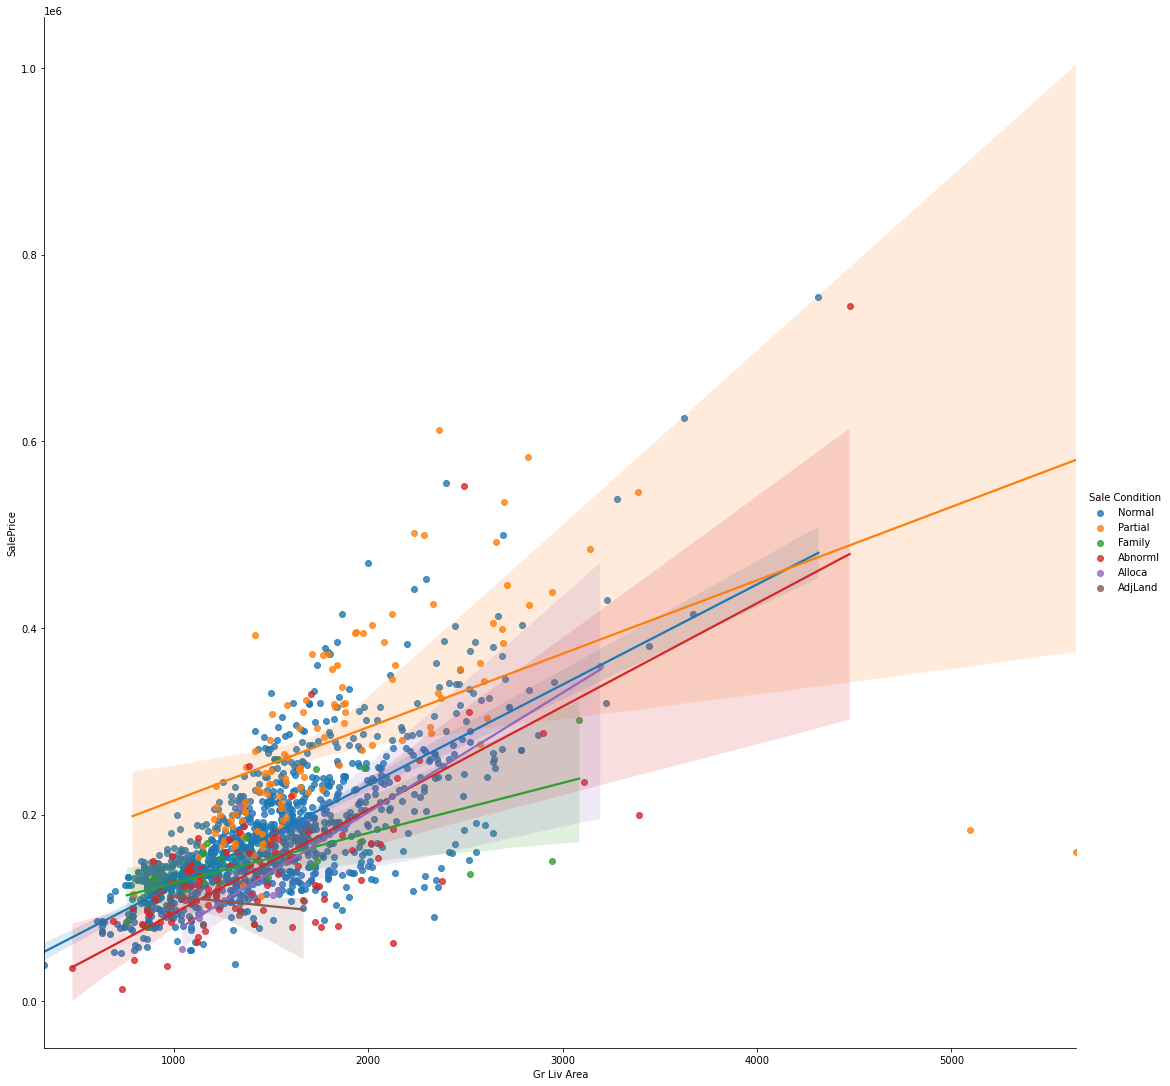

In [7]:
dfx = df_train.copy()

rc = [
    "Sale Condition",
    "SalePrice",
    "Gr Liv Area"
]

dfx = dfx.loc[:, rc]

sns.lmplot(
    data = dfx,
    x = "Gr Liv Area",
    y = "SalePrice",
    hue = "Sale Condition",
    height = 15 
)

#### Does column "MS Zoning" has a relevant influence on the sale price?

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

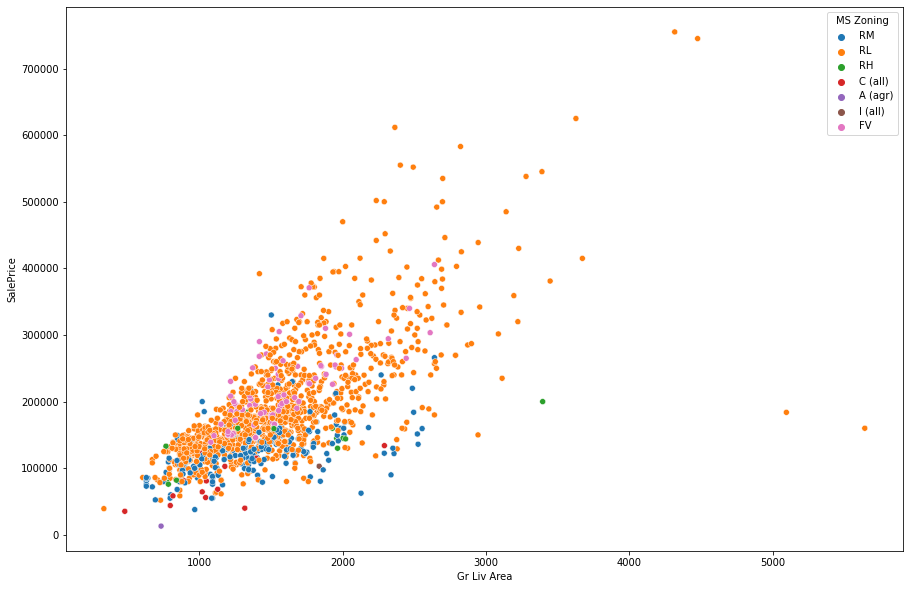

In [8]:
dfx = df_train.copy()

rc = [
    "MS Zoning",
    "SalePrice",
    "Gr Liv Area"
]

dfx = dfx.loc[:, rc]

f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(
    data = dfx,
    x = "Gr Liv Area",
    y = "SalePrice",
    hue = "MS Zoning",
    ax = ax
)

<AxesSubplot:xlabel='MS Zoning', ylabel='SalePrice'>

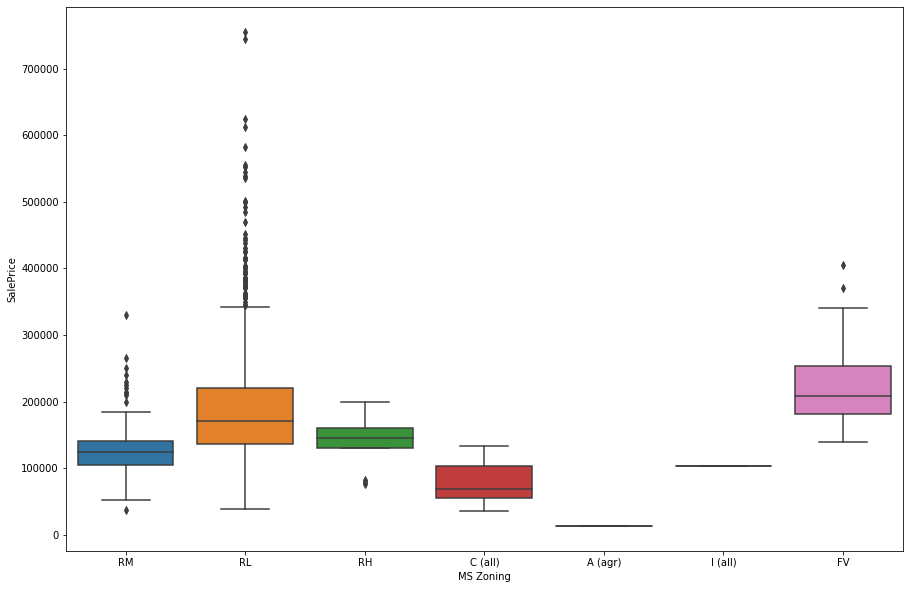

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data = dfx,
    x = "MS Zoning",
    y = "SalePrice",
    ax = ax
)

#### Does "Lot Area" is a good predictor of sale price?

<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

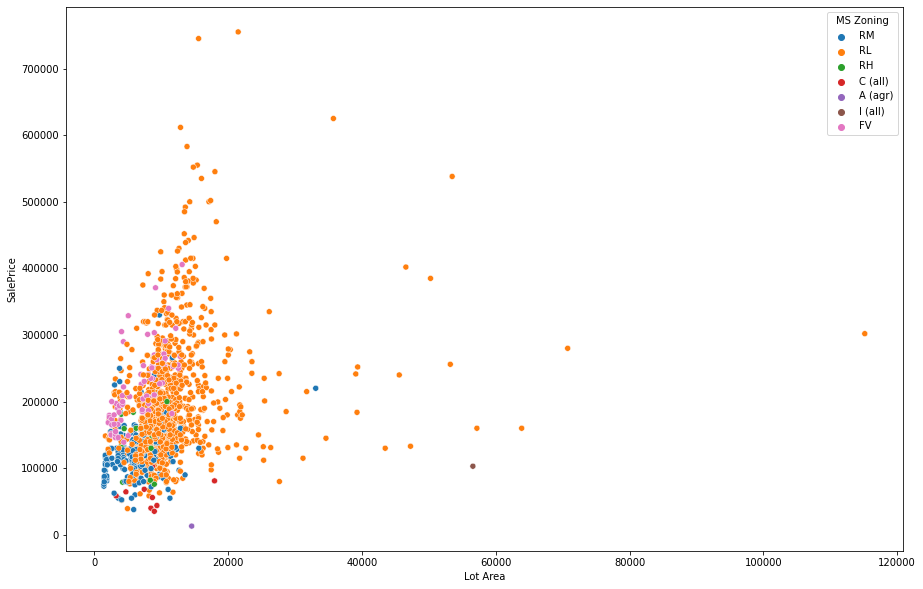

In [10]:
dfx = df_train.copy()

rc = [
    "Lot Area",
    "SalePrice",
    "MS Zoning"
]

dfx = dfx.loc[:, rc]

f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(
    data = dfx,
    x = "Lot Area",
    y = "SalePrice",
    hue = "MS Zoning",
    ax = ax
)

# Data preparation

## Simplifying data based on definitions dictionary

In [11]:
## Cleaning data based on definitions dictionary.
housingc = clean_data(df_train)

## Adding training labels to cleaned data.
housingc = housingc.join(df_train["SalePrice"])

### Separating training data from labels.

In [12]:
## Training labels
housingc_labs = housingc["SalePrice"]

## Training data
housingc.drop("SalePrice", axis=1, inplace=True)

### Reviewing information about this data

In [13]:
## Reviewing obtained dataframe
housingc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1466
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MS Zoning      1208 non-null   category
 1   Lot Area       1208 non-null   int64   
 2   Overall Qual   1208 non-null   int64   
 3   Year Built     1208 non-null   int64   
 4   Exter Qual     1208 non-null   category
 5   Total Bsmt SF  1208 non-null   int64   
 6   1st Flr SF     1208 non-null   int64   
 7   Gr Liv Area    1208 non-null   int64   
 8   Garage Cars    1208 non-null   int64   
 9   Garage Area    1208 non-null   int64   
dtypes: category(2), int64(8)
memory usage: 127.6 KB


In [14]:
housingc["MS Zoning"].value_counts()

1    941
0    267
Name: MS Zoning, dtype: int64

In [15]:
housingc["Exter Qual"].value_counts()

TA    788
Gd    383
Ex     21
Fa     16
Name: Exter Qual, dtype: int64

### Specifying numerical and categorical columns

In [17]:
housingc_num = []
housingc_cat = []

for feat in features_dict:
    if (features_dict[feat]["relevant"] == True) & ((features_dict[feat]["data_obj_type"] == "float64") | (features_dict[feat]["data_obj_type"] == "int64")) & (feat != "SalePrice"):
        housingc_num.append(feat)
    elif (features_dict[feat]["relevant"] == True) & (features_dict[feat]["data_obj_type"] == "category"):
        housingc_cat.append(feat)

print("Numerical columns: {}\n".format(housingc_num))
print("Categorical columns: {}".format(housingc_cat))

Numerical columns: ['Lot Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']

Categorical columns: ['MS Zoning', 'Exter Qual']


## Creating and executing pipelines

### Numeric pipeline

In [18]:
num_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
    ])

### Categorical pipeline

In [19]:
cat_pipeline = Pipeline([
        ("one_hot_encoder", OneHotEncoder()),
    ])

### Full pipeline

In [20]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, housingc_num),
    ("cat", cat_pipeline, housingc_cat),
])

### Preparing data

In [21]:
housingc_prp = full_pipeline.fit_transform(housingc)

---

## Training and evaluating models

### Simple evaluation

#### Linear regressión

In [22]:
## Defining and training model
lin_reg = LinearRegression()
lin_reg.fit(housingc_prp, housingc_labs)

LinearRegression()

In [23]:
## Evluating error with RMSE.
housingc_predicts = lin_reg.predict(housingc_prp)
lin_msle = mean_squared_log_error(housingc_labs, abs(housingc_predicts))
lin_msle

## NOTA:
#### Hay un valor que salió negativo y lo estoy cambiando a positivo arbitrariamente.

0.022937711708893523

#### Decision tree regresor

In [24]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housingc_prp, housingc_labs)

DecisionTreeRegressor()

In [25]:
## Evluating error with RMSE.
housingc_predicts = tree_reg.predict(housingc_prp)
tree_msle = mean_squared_log_error(housingc_labs, housingc_predicts)
tree_msle

8.820983122670802e-06

#### Random forrest

In [26]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housingc_prp, housingc_labs)

RandomForestRegressor()

In [27]:
## Evluating error with RMSE.
housingc_predicts = forest_reg.predict(housingc_prp)
forest_msle = mean_squared_log_error(housingc_labs, housingc_predicts)
forest_msle

0.002861236005859733

### Using cross validation

In [64]:
## Linear regression
lin_cv_scores = cross_val_score(lin_reg, 
                             abs(housingc_prp), 
                             housingc_labs,
                             scoring="neg_mean_squared_log_error", 
                             cv=10)
display_scores(-lin_cv_scores)

Scores: [0.12054771 0.05791683 0.12291924 0.13665646 0.05896073 0.04550686
 0.04896429 0.11676918 0.0560267  0.07348844]
Mean: 0.0837756445350432
Standard deviation: 0.03406755019654306


In [65]:
## Decision tree
tree_cv_scores = cross_val_score(tree_reg, 
                             abs(housingc_prp), 
                             housingc_labs,
                             scoring="neg_mean_squared_log_error", 
                             cv=10)
display_scores(-tree_cv_scores)

Scores: [0.16184243 0.04107036 0.07697855 0.11655084 0.04321175 0.03228167
 0.03048225 0.11430178 0.04390706 0.07166405]
Mean: 0.07322907267866788
Standard deviation: 0.04210885968747272


In [66]:
## Decision forest
forest_cv_scores = cross_val_score(forest_reg, 
                             abs(housingc_prp), 
                             housingc_labs,
                             scoring="neg_mean_squared_log_error", 
                             cv=10)
display_scores(-forest_cv_scores)

Scores: [0.1350961  0.02078266 0.05566903 0.06989083 0.02368754 0.01774671
 0.02782165 0.07034395 0.02345213 0.04142279]
Mean: 0.04859133933910021
Standard deviation: 0.034524877952984985


## Predictions on test data

### Initial cleaning of data

In [67]:
## Cleaning data based on definitions dictionary.
housingc_test = clean_data(df_test)

### Passing test data through constructed pipeline

In [68]:
housingc_test_prp = full_pipeline.fit_transform(housingc_test)

### Making predictions with constructed model

In [69]:
housingc_test_predicts = forest_reg.predict(housingc_test_prp)

### Formatting predictions

In [71]:
housingc_test_pred_form = format_predicts(housingc_test_predicts)
housingc_test_pred_form.to_csv("sub_rp_1022_v3.csv")

In [72]:
housingc_test_pred_form

,SalePrice
id,
1,238117.72
2,190434.44
3,136031.50
4,250273.74
5,152218.00
...,...
1199,142671.90
1200,225467.74
1201,160052.90


### Comparing with other results

In [45]:
df_final_eval = df_samplesub.join(housingc_test_pred_form, rsuffix="_Robs")
df_final_eval

,id,SalePrice,id_Robs,SalePrice_Robs
0,1,180401.23,1,232994.843823
1,2,180401.23,2,209090.302428
2,3,180401.23,3,132270.942282
3,4,180401.23,4,246478.946790
4,5,180401.23,5,174938.671442
...,...,...,...,...
1198,1199,180401.23,1199,145088.831130
1199,1200,180401.23,1200,222251.808399
1200,1201,180401.23,1201,153090.604062
1201,1202,180401.23,1202,139880.593186


In [46]:
df_final_eval = df_final_eval.loc[:, ["SalePrice", "SalePrice_Robs"]]
df_final_eval

,SalePrice,SalePrice_Robs
0,180401.23,232994.843823
1,180401.23,209090.302428
2,180401.23,132270.942282
3,180401.23,246478.946790
4,180401.23,174938.671442
...,...,...
1198,180401.23,145088.831130
1199,180401.23,222251.808399
1200,180401.23,153090.604062
1201,180401.23,139880.593186


<AxesSubplot:>

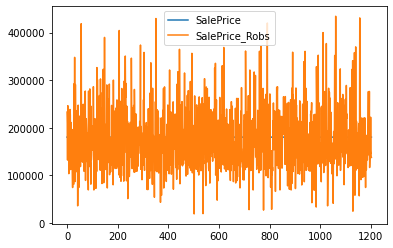

In [47]:
df_final_eval.plot()

---

# Notes

## Bugs to solve

- [ ] The code to eliminate "SalesPrice" from numerical features is "hard-coded".
- [ ] No estoy seguro si estoy cayendo en data leaking al momento de trabajar con los datos de prueba. No se si sí debería estar aplicando mi función de clean.
- [ ] Uno de los features ("Exter Cond") tiene diferente número de categorías en el entrenamiento que en la prueba. Una posible solución podría ser convertir esas categorías en números. (Por lo pronto se va a eliminar).

## Features dictionary

In [ ]:
features_dict

In [ ]:
for key in features_dict:
    features_dict[key]["notes"] = "-"

In [ ]:
features_dict

In [ ]:
json_dump_dict(features_dict)

---

## Test 1
- SkLearn Linear Regression (Housing Prices Example): https://www.youtube.com/watch?v=JTj-WgWLKFM

In [ ]:
boston = datasets.load_boston()

In [ ]:
boston

In [ ]:
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [ ]:
df_x.describe()

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [ ]:
reg.fit(x_train, y_train)

In [ ]:
reg.coef_

In [ ]:
a = reg.predict(x_test)

In [ ]:
a[4]

In [ ]:
y_test[0]

In [ ]:
# MSE
np.mean((a - y_test)**2)

---